# STUDENT PERFORMANCE INDICATOR

## DATA EXPLORING AND VISUALIZATION

### Importing Libraries

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


### Exploring Data

In [22]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Project Deployment\notebook\data\raw.csv')

df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
172,female,group D,some college,standard,none,79,86,81
296,male,group A,some high school,standard,completed,46,41,43
321,female,group E,high school,standard,none,75,86,79
371,female,group C,some college,free/reduced,completed,45,73,70
866,male,group C,high school,free/reduced,none,59,53,52


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
[df[i].unique() for i in df.columns[:5]]

[array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object)]

In [35]:
df.shape

(1000, 8)

### Data Checks

In [36]:
# missing value
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [42]:
# duplicate values
df.duplicated().sum()

np.int64(0)

In [45]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [46]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [48]:
# define numerical and catagorical feature

numerical_features = [i for i in df.columns if df[i].dtype != 'O']
catagorical_features = [i for i in df.columns if df[i].dtype == 'O']

print(f'numerical features : {numerical_features}')
print(f'catagorical features : {catagorical_features}')

numerical features : ['math score', 'reading score', 'writing score']
catagorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [52]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
895,female,group E,some high school,free/reduced,none,32,34,38,104,34.666667
966,male,group A,some high school,standard,completed,66,68,64,198,66.000000
672,female,group C,some college,standard,none,69,78,76,223,74.333333
599,female,group D,some high school,standard,none,65,82,81,228,76.000000


In [61]:
[f'{i} : {np.median(list(df[i]))}' for i in numerical_features]

['math score : 66.0', 'reading score : 70.0', 'writing score : 69.0']

In [69]:
np.median(list(df['average']))

np.float64(68.33333333333333)

### Visualizing Data

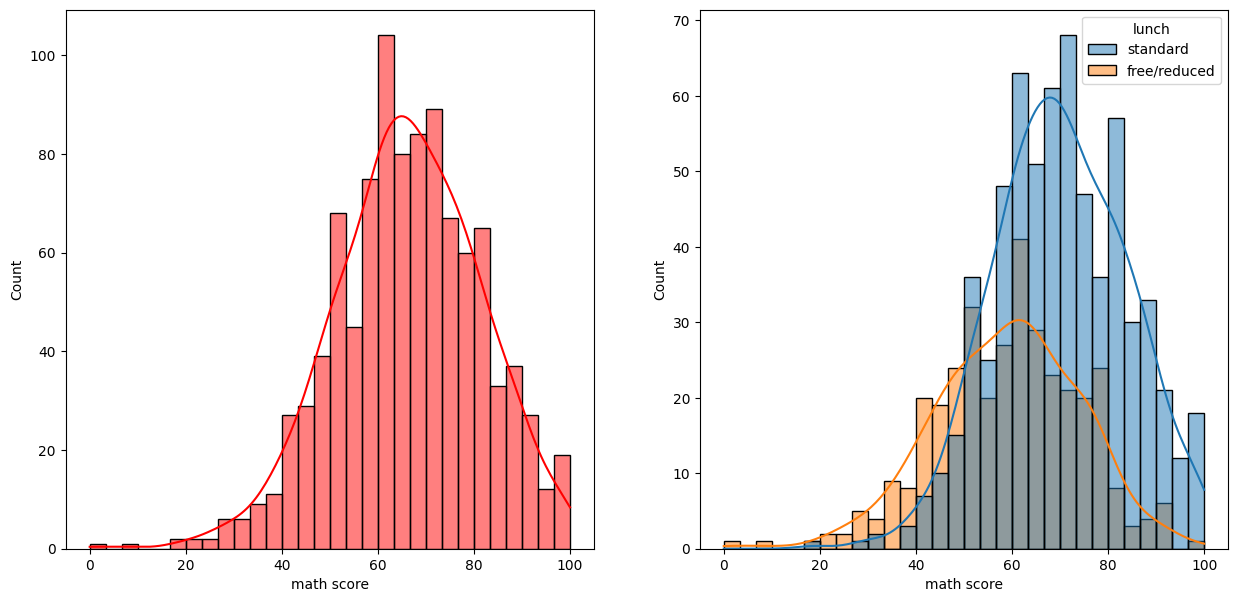

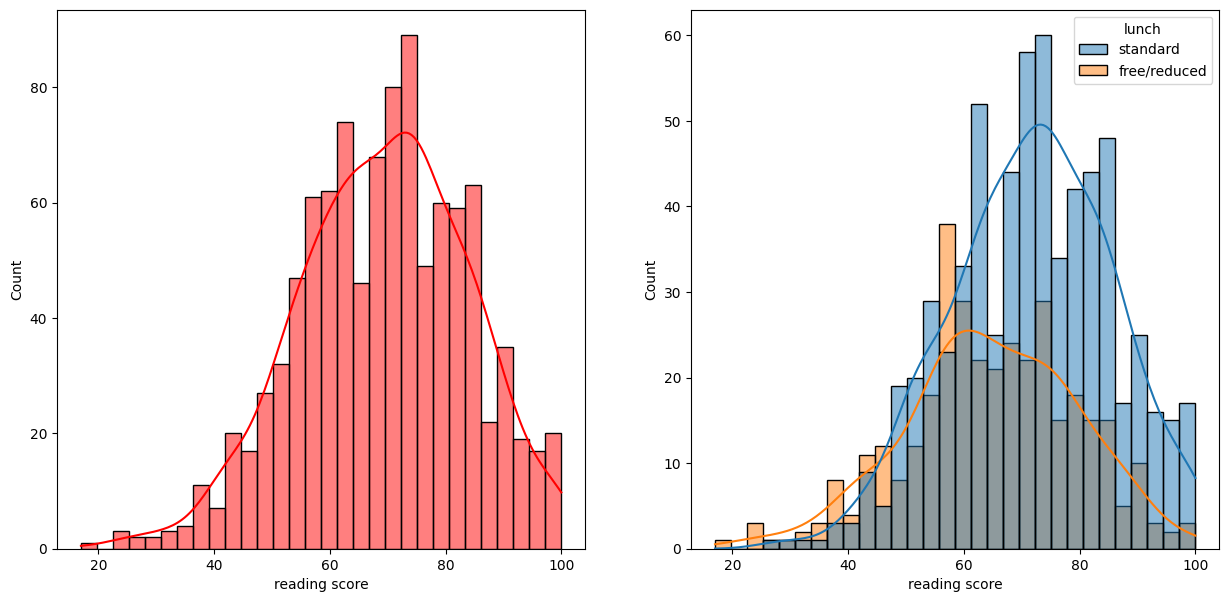

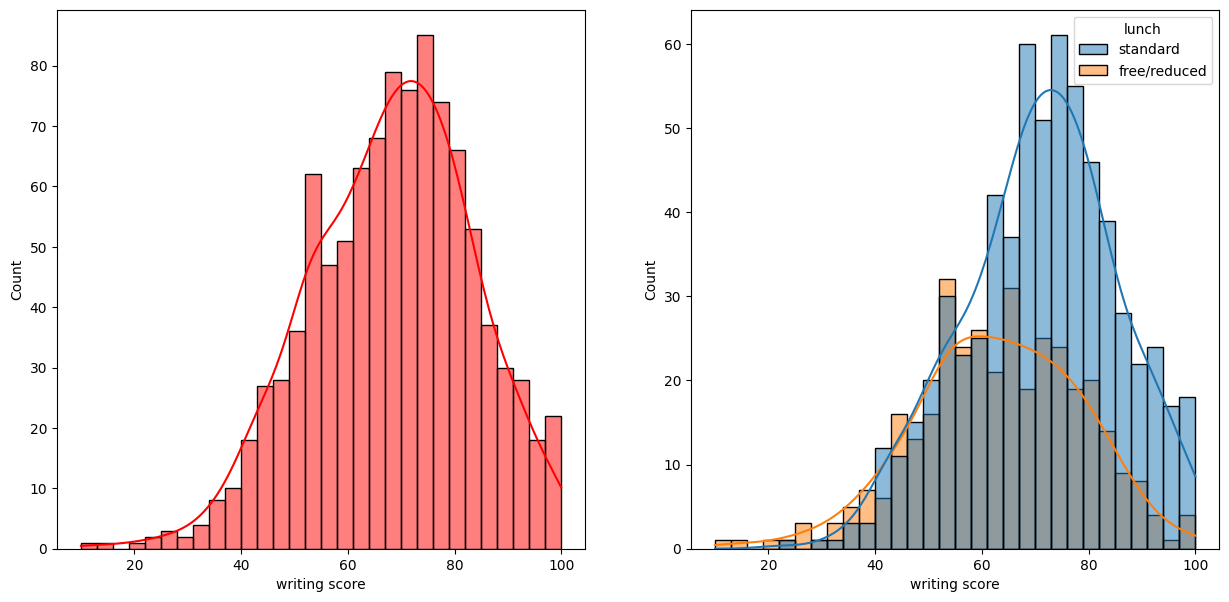

In [80]:
def plots_based_on_catagory(df, x, catagorical_parameter):
    fig, axs = plt.subplots(1, 2, figsize = (15, 7))
    plt.subplot(121)
    sns.histplot(data=df, x = x, bins=30, kde=True, color='r')
    plt.subplot(122)
    sns.histplot(data=df, x = x, bins=30, kde=True, hue=catagorical_parameter)
    plt.show()

catagorical_parameter = 'lunch'
for i in numerical_feature:
    plots_based_on_catagory(df, i, catagorical_parameter)